In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# A Chemist's stumble into data...

## Part1. File handling and data extraction

### Starting at the beginning.  The problem with GUIs...

Gaussian Inc. provide a great piece of Quantum Chemistry code for calculation of molecular properties.  But using the supplied GUI, GaussView, (with practice) set up for one calculation takes something like 5-10 for one material

Job parameter window; at least 6 / 10 tabs require settings for most standard jobs...
<img src="Figs/GV.png" style="width:95%;">


And what does that do?  Gaussian code takes text file input:

    %nprocshared=4
    %mem=7GB
    %chk=Phenyl-Iodide0.chk
    #p SP B3LYP/gen pseudo=read nosym

    Single Point Calculation

    0 1
    C                 -1.75158050   -1.84749940    0.00119900
    C                 -0.35642050   -1.84749940    0.00119900
    C                  0.34111750   -0.63974840    0.00119900
    C                 -0.35653650    0.56876060    0.00000000
    C                 -1.75136150    0.56868260   -0.00047900
    C                 -2.44896250   -0.63952340    0.00051700
    H                 -2.30133950   -2.79981640    0.00164900
    H                  0.19308750   -2.80001240    0.00251400
    H                  0.19366350    1.52090360   -0.00005900
    H                 -2.30148350    1.52096360   -0.00143200
    H                 -3.54856650   -0.63934040    0.00033700
    I                  2.44111715   -0.63959563    0.00240972

    C H 0
    6-31g(d)
    ****
    I 0
    lanl2dz
    ****

For setting up 10s-100s of calculations with a standard job parameters, inheritance of a Perl script for parsing and reformatting input files was a real eye-opener!

Similarly, for output - Gaussian outputs to a plain text file:

     Entering Gaussian System, Link 0=g09
     Input=Phenyl-Iodide0.com
     Output=Phenyl-Iodide0.log
     Initial command:
     /usr/local/gaussian09/g09/l1.exe "/CDT/scratch/2367.1.mainqueue/Gau-19603.inp" -scrdir="/CDT/scratch/2367.1.mainqueue/"
     Entering Link 1 = /usr/local/gaussian09/g09/l1.exe PID=     19608.

     Copyright (c) 1988,1990,1992,1993,1995,1998,2003,2009,2013,
                Gaussian, Inc.  All Rights Reserved.

     This is part of the Gaussian(R) 09 program.  It is based on
     the Gaussian(R) 03 system (copyright 2003, Gaussian, Inc.),
     the Gaussian(R) 98 system (copyright 1998, Gaussian, Inc.),
     the Gaussian(R) 94 system (copyright 1995, Gaussian, Inc.),
     the Gaussian 92(TM) system (copyright 1992, Gaussian, Inc.),
     the Gaussian 90(TM) system (copyright 1990, Gaussian, Inc.),
     the Gaussian 88(TM) system (copyright 1988, Gaussian, Inc.),
     the Gaussian 86(TM) system (copyright 1986, Carnegie Mellon
     University), and the Gaussian 82(TM) system (copyright 1983,
     Carnegie Mellon University). Gaussian is a federally registered
     trademark of Gaussian, Inc.

     This software contains proprietary and confidential information,
     including trade secrets, belonging to Gaussian, Inc.

     This software is provided under written license and may be
     used, copied, transmitted, or stored only in accord with that
     written license.

     The following legend is applicable only to US Government
     contracts under FAR:

                        RESTRICTED RIGHTS LEGEND

     Use, reproduction and disclosure by the US Government is
     subject to restrictions as set forth in subparagraphs (a)
     and (c) of the Commercial Computer Software - Restricted
     Rights clause in FAR 52.227-19.

     Gaussian, Inc.
     340 Quinnipiac St., Bldg. 40, Wallingford CT 06492


     ---------------------------------------------------------------
     Warning -- This program may not be used in any manner that
     competes with the business of Gaussian, Inc. or will provide
     assistance to any competitor of Gaussian, Inc.  The licensee
     of this program is prohibited from giving any competitor of
     Gaussian, Inc. access to this program.  By using this program,
     the user acknowledges that Gaussian, Inc. is engaged in the
     business of creating and licensing software in the field of
     computational chemistry and represents and warrants to the
     licensee that it is not a competitor of Gaussian, Inc. and that
     it will not use this program in any manner prohibited above.
     ---------------------------------------------------------------


     Cite this work as:
     Gaussian 09, Revision D.01,
     M. J. Frisch, G. W. Trucks, H. B. Schlegel, G. E. Scuseria, 
     M. A. Robb, J. R. Cheeseman, G. Scalmani, V. Barone, B. Mennucci, 
     G. A. Petersson, H. Nakatsuji, M. Caricato, X. Li, H. P. Hratchian, 
     A. F. Izmaylov, J. Bloino, G. Zheng, J. L. Sonnenberg, M. Hada, 
     M. Ehara, K. Toyota, R. Fukuda, J. Hasegawa, M. Ishida, T. Nakajima, 
     Y. Honda, O. Kitao, H. Nakai, T. Vreven, J. A. Montgomery, Jr., 
     J. E. Peralta, F. Ogliaro, M. Bearpark, J. J. Heyd, E. Brothers, 
     K. N. Kudin, V. N. Staroverov, T. Keith, R. Kobayashi, J. Normand, 
     K. Raghavachari, A. Rendell, J. C. Burant, S. S. Iyengar, J. Tomasi, 
     M. Cossi, N. Rega, J. M. Millam, M. Klene, J. E. Knox, J. B. Cross, 
     V. Bakken, C. Adamo, J. Jaramillo, R. Gomperts, R. E. Stratmann, 
     O. Yazyev, A. J. Austin, R. Cammi, C. Pomelli, J. W. Ochterski, 
     R. L. Martin, K. Morokuma, V. G. Zakrzewski, G. A. Voth, 
     P. Salvador, J. J. Dannenberg, S. Dapprich, A. D. Daniels, 
     O. Farkas, J. B. Foresman, J. V. Ortiz, J. Cioslowski, 
     and D. J. Fox, Gaussian, Inc., Wallingford CT, 2013.

     ******************************************
     Gaussian 09:  EM64L-G09RevD.01 24-Apr-2013
                    29-Jan-2019 
     ******************************************
     %nprocshared=4
     Will use up to    4 processors via shared memory.
     %mem=7GB
     %chk=Phenyl-Iodide0.chk
     ---------------------------------------------------
     #p SP B3LYP/gen pseudo=read nosym geom=connectivity
     ---------------------------------------------------
     1/38=1,57=2/1;
     2/12=2,15=1,17=6,18=5,40=1/2;
     3/5=7,11=2,16=1,17=8,25=1,30=1,74=-5/1,2,3;
     4//1;
     5/5=2,38=5/2;
     6/7=2,8=2,9=2,10=2,28=1/1;
     99/5=1,9=1/99;
     Leave Link    1 at Tue Jan 29 13:52:39 2019, MaxMem=   939524096 cpu:         0.3
     (Enter /usr/local/gaussian09/g09/l101.exe)
     ------------------------
     Single Point Calculation
     ------------------------
     Symbolic Z-matrix:
     Charge =  0 Multiplicity = 1
     C                    -1.75158  -1.8475    0.0012 
     C                    -0.35642  -1.8475    0.0012 
     C                     0.34112  -0.63975   0.0012 
     C                    -0.35654   0.56876   0. 
     C                    -1.75136   0.56868  -0.00048 
     C                    -2.44896  -0.63952   0.00052 
     H                    -2.30134  -2.79982   0.00165 
     H                     0.19309  -2.80001   0.00251 
     H                     0.19366   1.5209   -0.00006 
     H                    -2.30148   1.52096  -0.00143 
     H                    -3.54857  -0.63934   0.00034 
     I                     2.44112  -0.6396    0.00241 

     NAtoms=     12 NQM=       12 NQMF=       0 NMMI=      0 NMMIF=      0
                    NMic=       0 NMicF=      0.
                        Isotopes and Nuclear Properties:
     (Nuclear quadrupole moments (NQMom) in fm**2, nuclear magnetic moments (NMagM)
      in nuclear magnetons)

      Atom         1           2           3           4           5           6           7           8           9          10
     IAtWgt=          12          12          12          12          12          12           1           1           1           1
     AtmWgt=  12.0000000  12.0000000  12.0000000  12.0000000  12.0000000  12.0000000   1.0078250   1.0078250   1.0078250   1.0078250
     NucSpn=           0           0           0           0           0           0           1           1           1           1
     AtZEff=   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
     NQMom=    0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
     NMagM=    0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   2.7928460   2.7928460   2.7928460   2.7928460
     AtZNuc=   6.0000000   6.0000000   6.0000000   6.0000000   6.0000000   6.0000000   1.0000000   1.0000000   1.0000000   1.0000000

      Atom        11          12
     IAtWgt=           1         127
     AtmWgt=   1.0078250 126.9004000
     NucSpn=           1           5
     AtZEff=   0.0000000   0.0000000
     NQMom=    0.0000000 -71.0000000
     NMagM=    2.7928460   2.8132800
     AtZNuc=   1.0000000  53.0000000
     Leave Link  101 at Tue Jan 29 13:52:39 2019, MaxMem=   939524096 cpu:         1.2
     (Enter /usr/local/gaussian09/g09/l202.exe)
                              Input orientation:                          
     ---------------------------------------------------------------------
     Center     Atomic      Atomic             Coordinates (Angstroms)
     Number     Number       Type             X           Y           Z
     ---------------------------------------------------------------------
          1          6           0       -1.751581   -1.847499    0.001199
          2          6           0       -0.356421   -1.847499    0.001199
          3          6           0        0.341118   -0.639748    0.001199
          4          6           0       -0.356537    0.568761    0.000000
          5          6           0       -1.751362    0.568683   -0.000479
          6          6           0       -2.448963   -0.639523    0.000517
          7          1           0       -2.301340   -2.799816    0.001649
          8          1           0        0.193088   -2.800012    0.002514
          9          1           0        0.193664    1.520904   -0.000059
         10          1           0       -2.301484    1.520964   -0.001432
         11          1           0       -3.548567   -0.639340    0.000337
         12         53           0        2.441117   -0.639596    0.002410
     ---------------------------------------------------------------------
                        Distance matrix (angstroms):
                        1          2          3          4          5
         1  C    0.000000
         2  C    1.395160   0.000000
         3  C    2.416205   1.394712   0.000000
         4  C    2.790065   2.416260   1.395427   0.000000
         5  C    2.416183   2.789946   2.416356   1.394825   0.000000
         6  C    1.394829   2.416183   2.790080   2.416236   1.395138
         7  H    1.099610   2.165553   3.412986   3.889675   3.413102
         8  H    2.165414   1.099655   2.165330   3.413316   3.889601
         9  H    3.889745   3.413024   2.165678   1.099680   2.165606
        10  H    3.413055   3.889707   3.413506   2.165528   1.099761
        11  H    2.165365   3.413128   3.889684   3.412999   2.165471
        12  I    4.363227   3.047171   2.100000   3.047457   4.363121
                        6          7          8          9         10
         6  C    0.000000
         7  H    2.165331   0.000000
         8  H    3.412938   2.494427   0.000000
         9  H    3.413344   4.989355   4.320917   0.000000
        10  H    2.165516   4.320781   4.989362   2.495147   0.000000
        11  H    1.099604   2.494641   4.320704   4.320988   2.494420
        12  I    4.890080   5.211281   3.117858   3.117501   5.211554
                       11         12
        11  H    0.000000
        12  I    5.989684   0.000000
     Symmetry turned off by external request.
     Stoichiometry    C6H5I
     Framework group  C1[X(C6H5I)]
     Deg. of freedom    30
     Full point group                 C1      NOp   1
     Rotational constants (GHZ):      5.6865079      0.7442016      0.6580780
     Leave Link  202 at Tue Jan 29 13:52:39 2019, MaxMem=   939524096 cpu:         0.0
     (Enter /usr/local/gaussian09/g09/l301.exe)
     General basis read from cards:  (5D, 7F)
     Centers:       1      2      3      4      5      6      7      8      9     10
     Centers:      11
     6-31g(d)
     ****
     Centers:      12
     lanl2dz
     ****
     ======================================================================================================
                                           Pseudopotential Parameters
     ======================================================================================================
      Center     Atomic      Valence      Angular      Power
      Number     Number     Electrons     Momentum     of R      Exponent        Coefficient   SO-Coeffient
     ======================================================================================================
        1          6
                                       No pseudopotential on this center.
        2          6
                                       No pseudopotential on this center.
        3          6
                                       No pseudopotential on this center.
        4          6
                                       No pseudopotential on this center.
        5          6
                                       No pseudopotential on this center.
        6          6
                                       No pseudopotential on this center.
        7          1
                                       No pseudopotential on this center.
        8          1
                                       No pseudopotential on this center.
        9          1
                                       No pseudopotential on this center.
       10          1
                                       No pseudopotential on this center.
       11          1
                                       No pseudopotential on this center.
       12         53            7
                                          F and up 
                                                         0        1.0715702       -0.07476210    0.00000000
                                                         1       44.1936028      -30.08112240    0.00000000
                                                         2       12.9367609      -75.37227210    0.00000000
                                                         2        3.1956412      -22.05637580    0.00000000
                                                         2        0.8589806       -1.69795850    0.00000000
                                          S - F
                                                         0      127.9202670        2.93800360    0.00000000
                                                         1       78.6211465       41.24712670    0.00000000
                                                         2       36.5146237      287.86800950    0.00000000
                                                         2        9.9065681      114.37585060    0.00000000
                                                         2        1.9420086       37.65477140    0.00000000
                                          P - F
                                                         0       13.0035304        2.22226300    0.00000000
                                                         1       76.0331404       39.40908310    0.00000000
                                                         2       24.1961684      177.40750020    0.00000000
                                                         2        6.4053433       77.98894620    0.00000000
                                                         2        1.5851786       25.75476410    0.00000000
                                          D - F
                                                         0       40.4278108        7.05243600    0.00000000
                                                         1       28.9084375       33.30416350    0.00000000
                                                         2       15.6268936      186.94538750    0.00000000
                                                         2        4.1442856       71.96883610    0.00000000
                                                         2        0.9377235        9.36306570    0.00000000
     ======================================================================================================
     Ernie: Thresh=  0.10000D-02 Tol=  0.10000D-05 Strict=F.
       102 basis functions,   200 primitive gaussians,   108 cartesian basis functions
        24 alpha electrons       24 beta electrons
           nuclear repulsion energy       238.0787638161 Hartrees.
     IExCor=  402 DFT=T Ex+Corr=B3LYP ExCW=0 ScaHFX=  0.200000
     ScaDFX=  0.800000  0.720000  1.000000  0.810000 ScalE2=  1.000000  1.000000
     IRadAn=      0 IRanWt=     -1 IRanGd=            0 ICorTp=0 IEmpDi=  4
     NAtoms=   12 NActive=   12 NUniq=   12 SFac= 1.00D+00 NAtFMM=   60 NAOKFM=F Big=F
     Integral buffers will be    131072 words long.
     Raffenetti 2 integral format.
     Two-electron integral symmetry is turned off.
     Leave Link  301 at Tue Jan 29 13:52:40 2019, MaxMem=   939524096 cpu:         1.0
     (Enter /usr/local/gaussian09/g09/l302.exe)
     NPDir=0 NMtPBC=     1 NCelOv=     1 NCel=       1 NClECP=     1 NCelD=      1
             NCelK=      1 NCelE2=     1 NClLst=     1 CellRange=     0.0.
     One-electron integrals computed using PRISM.
       1 Symmetry operations used in ECPInt.
     ECPInt:  NShTT=     741 NPrTT=    4403 LenC2=     742 LenP2D=    3451.
     LDataN:  DoStor=T MaxTD1= 5 Len=  102
     NBasis=   102 RedAO= T EigKep=  5.38D-04  NBF=   102
     NBsUse=   102 1.00D-06 EigRej= -1.00D+00 NBFU=   102
     Precomputing XC quadrature grid using
     IXCGrd= 4 IRadAn=           0 IRanWt=          -1 IRanGd=           0 AccXCQ= 0.00D+00.
     Defaulting to unpruned grid for atomic number  53.
     Generated NRdTot=       0 NPtTot=           0 NUsed=           0 NTot=          32
     NSgBfM=   108   108   108   108   108 MxSgAt=    12 MxSgA2=    12.
     Leave Link  302 at Tue Jan 29 13:52:40 2019, MaxMem=   939524096 cpu:         2.4
     (Enter /usr/local/gaussian09/g09/l303.exe)
     DipDrv:  MaxL=1.
     Leave Link  303 at Tue Jan 29 13:52:40 2019, MaxMem=   939524096 cpu:         0.3
     (Enter /usr/local/gaussian09/g09/l401.exe)
     ExpMin= 1.05D-01 ExpMax= 3.05D+03 ExpMxC= 4.57D+02 IAcc=1 IRadAn=         1 AccDes= 0.00D+00
     Harris functional with IExCor=  402 and IRadAn=       1 diagonalized for initial guess.
     HarFok:  IExCor=  402 AccDes= 0.00D+00 IRadAn=         1 IDoV= 1 UseB2=F ITyADJ=14
     ICtDFT=  3500011 ScaDFX=  1.000000  1.000000  1.000000  1.000000
     Defaulting to unpruned grid for atomic number  53.
     Defaulting to unpruned grid for atomic number  53.
     Defaulting to unpruned grid for atomic number  53.
     Defaulting to unpruned grid for atomic number  53.
     FoFCou: FMM=F IPFlag=           0 FMFlag=      100000 FMFlg1=           0
             NFxFlg=           0 DoJE=T BraDBF=F KetDBF=T FulRan=T
             wScrn=  0.000000 ICntrl=     500 IOpCl=  0 I1Cent=   200000004 NGrid=           0
             NMat0=    1 NMatS0=      1 NMatT0=    0 NMatD0=    1 NMtDS0=    0 NMtDT0=    0
     Symmetry not used in FoFCou.
     Harris En= -242.962202607714    
     JPrj=0 DoOrth=F DoCkMO=F.
     Leave Link  401 at Tue Jan 29 13:52:41 2019, MaxMem=   939524096 cpu:         1.2
     (Enter /usr/local/gaussian09/g09/l502.exe)
     Closed shell SCF:
     Using DIIS extrapolation, IDIIS=  1040.
     Two-electron integral symmetry not used.
     Keep R1 ints in memory in canonical form, NReq=14785935.
     IVT=       54862 IEndB=       54862 NGot=   939524096 MDV=   925669604
     LenX=   925669604 LenY=   925657499
     Requested convergence on RMS density matrix=1.00D-08 within 128 cycles.
     Requested convergence on MAX density matrix=1.00D-06.
     Requested convergence on             energy=1.00D-06.
     No special actions if energy rises.
     FoFCou: FMM=F IPFlag=           0 FMFlag=           0 FMFlg1=           0
             NFxFlg=           0 DoJE=F BraDBF=F KetDBF=F FulRan=T
             wScrn=  0.000000 ICntrl=     600 IOpCl=  0 I1Cent=           0 NGrid=           0
             NMat0=    1 NMatS0=   5253 NMatT0=    0 NMatD0=    1 NMtDS0=    0 NMtDT0=    0
     Symmetry not used in FoFCou.
     Integral accuracy reduced to 1.0D-05 until final iterations.

     Cycle   1  Pass 0  IDiag  1:
     Defaulting to unpruned grid for atomic number  53.
     Defaulting to unpruned grid for atomic number  53.
     Defaulting to unpruned grid for atomic number  53.
     Defaulting to unpruned grid for atomic number  53.
     E= -242.866302645536    
     DIIS: error= 4.78D-02 at cycle   1 NSaved=   1.
     NSaved= 1 IEnMin= 1 EnMin= -242.866302645536     IErMin= 1 ErrMin= 4.78D-02
     ErrMax= 4.78D-02  0.00D+00 EMaxC= 1.00D-01 BMatC= 1.26D-01 BMatP= 1.26D-01
     IDIUse=3 WtCom= 5.22D-01 WtEn= 4.78D-01
     Coeff-Com:  0.100D+01
     Coeff-En:   0.100D+01
     Coeff:      0.100D+01
     Gap=     0.372 Goal=   None    Shift=    0.000
     GapD=    0.372 DampG=1.000 DampE=0.500 DampFc=0.5000 IDamp=-1.
     Damping current iteration by 5.00D-01
     RMSDP=8.62D-03 MaxDP=1.19D-01              OVMax= 2.08D-01

     Cycle   2  Pass 0  IDiag  1:
     E= -242.931462140438     Delta-E=       -0.065159494902 Rises=F Damp=T
     DIIS: error= 7.28D-03 at cycle   2 NSaved=   2.
     NSaved= 2 IEnMin= 2 EnMin= -242.931462140438     IErMin= 2 ErrMin= 7.28D-03
     ErrMax= 7.28D-03  0.00D+00 EMaxC= 1.00D-01 BMatC= 5.83D-03 BMatP= 1.26D-01
     IDIUse=3 WtCom= 9.27D-01 WtEn= 7.28D-02
     Coeff-Com:  0.867D-01 0.913D+00
     Coeff-En:   0.163D+00 0.837D+00
     Coeff:      0.922D-01 0.908D+00
     Gap=     0.235 Goal=   None    Shift=    0.000
     RMSDP=2.31D-03 MaxDP=2.35D-02 DE=-6.52D-02 OVMax= 1.50D-01

     Cycle   3  Pass 0  IDiag  1:
     E= -243.019519146700     Delta-E=       -0.088057006262 Rises=F Damp=F
     DIIS: error= 4.09D-03 at cycle   3 NSaved=   3.
     NSaved= 3 IEnMin= 3 EnMin= -243.019519146700     IErMin= 3 ErrMin= 4.09D-03
     ErrMax= 4.09D-03  0.00D+00 EMaxC= 1.00D-01 BMatC= 8.75D-04 BMatP= 5.83D-03
     IDIUse=3 WtCom= 9.59D-01 WtEn= 4.09D-02
     Coeff-Com: -0.107D-01 0.236D+00 0.774D+00
     Coeff-En:   0.000D+00 0.000D+00 0.100D+01
     Coeff:     -0.103D-01 0.227D+00 0.784D+00
     Gap=     0.213 Goal=   None    Shift=    0.000
     RMSDP=4.95D-04 MaxDP=9.03D-03 DE=-8.81D-02 OVMax= 1.15D-02

     Cycle   4  Pass 0  IDiag  1:
     E= -243.020237428882     Delta-E=       -0.000718282181 Rises=F Damp=F
     DIIS: error= 1.33D-03 at cycle   4 NSaved=   4.
     NSaved= 4 IEnMin= 4 EnMin= -243.020237428882     IErMin= 4 ErrMin= 1.33D-03
     ErrMax= 1.33D-03  0.00D+00 EMaxC= 1.00D-01 BMatC= 2.19D-04 BMatP= 8.75D-04
     IDIUse=3 WtCom= 9.87D-01 WtEn= 1.33D-02
     Coeff-Com: -0.896D-02 0.741D-01 0.378D+00 0.557D+00
     Coeff-En:   0.000D+00 0.000D+00 0.911D-01 0.909D+00
     Coeff:     -0.884D-02 0.731D-01 0.374D+00 0.562D+00
     Gap=     0.211 Goal=   None    Shift=    0.000
     RMSDP=2.23D-04 MaxDP=5.87D-03 DE=-7.18D-04 OVMax= 7.43D-03

     Cycle   5  Pass 0  IDiag  1:
     E= -243.020391774678     Delta-E=       -0.000154345796 Rises=F Damp=F
     DIIS: error= 8.19D-04 at cycle   5 NSaved=   5.
     NSaved= 5 IEnMin= 5 EnMin= -243.020391774678     IErMin= 5 ErrMin= 8.19D-04
     ErrMax= 8.19D-04  0.00D+00 EMaxC= 1.00D-01 BMatC= 6.87D-05 BMatP= 2.19D-04
     IDIUse=3 WtCom= 9.92D-01 WtEn= 8.19D-03
     Coeff-Com: -0.383D-02 0.656D-02 0.101D+00 0.373D+00 0.522D+00
     Coeff-En:   0.000D+00 0.000D+00 0.000D+00 0.280D+00 0.720D+00
     Coeff:     -0.380D-02 0.651D-02 0.101D+00 0.373D+00 0.524D+00
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=1.03D-04 MaxDP=2.19D-03 DE=-1.54D-04 OVMax= 2.92D-03

     Cycle   6  Pass 0  IDiag  1:
     E= -243.020463710758     Delta-E=       -0.000071936080 Rises=F Damp=F
     DIIS: error= 2.63D-04 at cycle   6 NSaved=   6.
     NSaved= 6 IEnMin= 6 EnMin= -243.020463710758     IErMin= 6 ErrMin= 2.63D-04
     ErrMax= 2.63D-04  0.00D+00 EMaxC= 1.00D-01 BMatC= 3.61D-06 BMatP= 6.87D-05
     IDIUse=3 WtCom= 9.97D-01 WtEn= 2.63D-03
     Coeff-Com: -0.197D-02 0.930D-03 0.482D-01 0.209D+00 0.323D+00 0.421D+00
     Coeff-En:   0.000D+00 0.000D+00 0.000D+00 0.000D+00 0.000D+00 0.100D+01
     Coeff:     -0.196D-02 0.927D-03 0.481D-01 0.209D+00 0.322D+00 0.422D+00
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=2.20D-05 MaxDP=3.51D-04 DE=-7.19D-05 OVMax= 1.06D-03

     Cycle   7  Pass 0  IDiag  1:
     E= -243.020467773216     Delta-E=       -0.000004062458 Rises=F Damp=F
     DIIS: error= 3.31D-05 at cycle   7 NSaved=   7.
     NSaved= 7 IEnMin= 7 EnMin= -243.020467773216     IErMin= 7 ErrMin= 3.31D-05
     ErrMax= 3.31D-05  0.00D+00 EMaxC= 1.00D-01 BMatC= 6.42D-08 BMatP= 3.61D-06
     IDIUse=1 WtCom= 1.00D+00 WtEn= 0.00D+00
     Coeff-Com: -0.961D-04-0.904D-03 0.277D-02 0.237D-01 0.390D-01 0.139D+00
     Coeff-Com:  0.797D+00
     Coeff:     -0.961D-04-0.904D-03 0.277D-02 0.237D-01 0.390D-01 0.139D+00
     Coeff:      0.797D+00
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=5.09D-06 MaxDP=8.57D-05 DE=-4.06D-06 OVMax= 1.16D-04

     Initial convergence to 1.0D-05 achieved.  Increase integral accuracy.
     Cycle   8  Pass 1  IDiag  1:
     E= -243.020232716226     Delta-E=        0.000235056990 Rises=F Damp=F
     DIIS: error= 6.51D-05 at cycle   1 NSaved=   1.
     NSaved= 1 IEnMin= 1 EnMin= -243.020232716226     IErMin= 1 ErrMin= 6.51D-05
     ErrMax= 6.51D-05  0.00D+00 EMaxC= 1.00D-01 BMatC= 1.44D-07 BMatP= 1.44D-07
     IDIUse=1 WtCom= 1.00D+00 WtEn= 0.00D+00
     Coeff-Com:  0.100D+01
     Coeff:      0.100D+01
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=5.09D-06 MaxDP=8.57D-05 DE= 2.35D-04 OVMax= 3.97D-04

     Cycle   9  Pass 1  IDiag  1:
     E= -243.020232984586     Delta-E=       -0.000000268360 Rises=F Damp=F
     DIIS: error= 1.96D-05 at cycle   2 NSaved=   2.
     NSaved= 2 IEnMin= 2 EnMin= -243.020232984586     IErMin= 2 ErrMin= 1.96D-05
     ErrMax= 1.96D-05  0.00D+00 EMaxC= 1.00D-01 BMatC= 1.65D-08 BMatP= 1.44D-07
     IDIUse=1 WtCom= 1.00D+00 WtEn= 0.00D+00
     Coeff-Com:  0.170D+00 0.830D+00
     Coeff:      0.170D+00 0.830D+00
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=4.54D-06 MaxDP=9.85D-05 DE=-2.68D-07 OVMax= 1.26D-04

     Cycle  10  Pass 1  IDiag  1:
     E= -243.020232988406     Delta-E=       -0.000000003820 Rises=F Damp=F
     DIIS: error= 1.60D-05 at cycle   3 NSaved=   3.
     NSaved= 3 IEnMin= 3 EnMin= -243.020232988406     IErMin= 3 ErrMin= 1.60D-05
     ErrMax= 1.60D-05  0.00D+00 EMaxC= 1.00D-01 BMatC= 1.93D-08 BMatP= 1.65D-08
     IDIUse=1 WtCom= 1.00D+00 WtEn= 0.00D+00
     Coeff-Com:  0.381D-01 0.519D+00 0.443D+00
     Coeff:      0.381D-01 0.519D+00 0.443D+00
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=1.95D-06 MaxDP=4.03D-05 DE=-3.82D-09 OVMax= 6.37D-05

     Cycle  11  Pass 1  IDiag  1:
     E= -243.020233009387     Delta-E=       -0.000000020982 Rises=F Damp=F
     DIIS: error= 4.53D-06 at cycle   4 NSaved=   4.
     NSaved= 4 IEnMin= 4 EnMin= -243.020233009387     IErMin= 4 ErrMin= 4.53D-06
     ErrMax= 4.53D-06  0.00D+00 EMaxC= 1.00D-01 BMatC= 1.63D-09 BMatP= 1.65D-08
     IDIUse=1 WtCom= 1.00D+00 WtEn= 0.00D+00
     Coeff-Com: -0.830D-02 0.167D+00 0.256D+00 0.585D+00
     Coeff:     -0.830D-02 0.167D+00 0.256D+00 0.585D+00
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=5.11D-07 MaxDP=1.27D-05 DE=-2.10D-08 OVMax= 1.56D-05

     Cycle  12  Pass 1  IDiag  1:
     E= -243.020233011290     Delta-E=       -0.000000001902 Rises=F Damp=F
     DIIS: error= 8.80D-07 at cycle   5 NSaved=   5.
     NSaved= 5 IEnMin= 5 EnMin= -243.020233011290     IErMin= 5 ErrMin= 8.80D-07
     ErrMax= 8.80D-07  0.00D+00 EMaxC= 1.00D-01 BMatC= 1.01D-10 BMatP= 1.63D-09
     IDIUse=1 WtCom= 1.00D+00 WtEn= 0.00D+00
     Coeff-Com: -0.572D-02 0.705D-01 0.123D+00 0.321D+00 0.491D+00
     Coeff:     -0.572D-02 0.705D-01 0.123D+00 0.321D+00 0.491D+00
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=1.21D-07 MaxDP=1.93D-06 DE=-1.90D-09 OVMax= 3.25D-06

     Cycle  13  Pass 1  IDiag  1:
     E= -243.020233011397     Delta-E=       -0.000000000107 Rises=F Damp=F
     DIIS: error= 1.74D-07 at cycle   6 NSaved=   6.
     NSaved= 6 IEnMin= 6 EnMin= -243.020233011397     IErMin= 6 ErrMin= 1.74D-07
     ErrMax= 1.74D-07  0.00D+00 EMaxC= 1.00D-01 BMatC= 2.74D-12 BMatP= 1.01D-10
     IDIUse=1 WtCom= 1.00D+00 WtEn= 0.00D+00
     Coeff-Com: -0.107D-02 0.844D-02 0.193D-01 0.557D-01 0.173D+00 0.745D+00
     Coeff:     -0.107D-02 0.844D-02 0.193D-01 0.557D-01 0.173D+00 0.745D+00
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=3.62D-08 MaxDP=5.18D-07 DE=-1.07D-10 OVMax= 1.03D-06

     Cycle  14  Pass 1  IDiag  1:
     E= -243.020233011402     Delta-E=       -0.000000000005 Rises=F Damp=F
     DIIS: error= 5.86D-08 at cycle   7 NSaved=   7.
     NSaved= 7 IEnMin= 7 EnMin= -243.020233011402     IErMin= 7 ErrMin= 5.86D-08
     ErrMax= 5.86D-08  0.00D+00 EMaxC= 1.00D-01 BMatC= 4.58D-13 BMatP= 2.74D-12
     IDIUse=1 WtCom= 1.00D+00 WtEn= 0.00D+00
     Coeff-Com: -0.482D-03 0.244D-02 0.664D-02 0.205D-01 0.697D-01 0.377D+00
     Coeff-Com:  0.524D+00
     Coeff:     -0.482D-03 0.244D-02 0.664D-02 0.205D-01 0.697D-01 0.377D+00
     Coeff:      0.524D+00
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=1.09D-08 MaxDP=1.36D-07 DE=-4.72D-12 OVMax= 2.98D-07

     Cycle  15  Pass 1  IDiag  1:
     E= -243.020233011401     Delta-E=        0.000000000001 Rises=F Damp=F
     DIIS: error= 1.62D-08 at cycle   8 NSaved=   8.
     NSaved= 8 IEnMin= 7 EnMin= -243.020233011402     IErMin= 8 ErrMin= 1.62D-08
     ErrMax= 1.62D-08  0.00D+00 EMaxC= 1.00D-01 BMatC= 3.66D-14 BMatP= 4.58D-13
     IDIUse=1 WtCom= 1.00D+00 WtEn= 0.00D+00
     Coeff-Com: -0.344D-04-0.432D-03-0.380D-03 0.213D-03 0.721D-02 0.837D-01
     Coeff-Com:  0.241D+00 0.669D+00
     Coeff:     -0.344D-04-0.432D-03-0.380D-03 0.213D-03 0.721D-02 0.837D-01
     Coeff:      0.241D+00 0.669D+00
     Gap=     0.212 Goal=   None    Shift=    0.000
     RMSDP=2.59D-09 MaxDP=3.38D-08 DE= 6.82D-13 OVMax= 8.39D-08

     SCF Done:  E(RB3LYP) =  -243.020233011     A.U. after   15 cycles
                NFock= 15  Conv=0.26D-08     -V/T= 2.0422
     KE= 2.331851278039D+02 PE=-1.034199016884D+03 EE= 3.199148922529D+02
     Leave Link  502 at Tue Jan 29 13:52:50 2019, MaxMem=   939524096 cpu:        32.5
     (Enter /usr/local/gaussian09/g09/l601.exe)
     Copying SCF densities to generalized density rwf, IOpCl= 0 IROHF=0.

     **********************************************************************

                Population analysis using the SCF density.

     **********************************************************************

     Alpha  occ. eigenvalues --  -10.23591 -10.20061 -10.20056 -10.19782 -10.19778
     Alpha  occ. eigenvalues --  -10.19540  -0.86734  -0.76950  -0.75617  -0.67965
     Alpha  occ. eigenvalues --   -0.61539  -0.59288  -0.51885  -0.46153  -0.45920
     Alpha  occ. eigenvalues --   -0.43113  -0.40829  -0.38256  -0.35673  -0.34067
     Alpha  occ. eigenvalues --   -0.29647  -0.26739  -0.26186  -0.23768
     Alpha virt. eigenvalues --   -0.02564  -0.01290  -0.01122   0.09436   0.13128
     Alpha virt. eigenvalues --    0.14716   0.15237   0.17544   0.17651   0.27839
     Alpha virt. eigenvalues --    0.27989   0.29742   0.30194   0.36676   0.39003
     Alpha virt. eigenvalues --    0.39808   0.47772   0.51892   0.54036   0.55055
     Alpha virt. eigenvalues --    0.57108   0.58820   0.58832   0.60002   0.60360
     Alpha virt. eigenvalues --    0.60615   0.61854   0.65349   0.66030   0.67195
     Alpha virt. eigenvalues --    0.73720   0.82121   0.82635   0.84016   0.85071
     Alpha virt. eigenvalues --    0.91131   0.92825   0.93787   0.96853   1.06633
     Alpha virt. eigenvalues --    1.08861   1.09748   1.14228   1.16674   1.24177
     Alpha virt. eigenvalues --    1.32868   1.38090   1.41902   1.46682   1.47091
     Alpha virt. eigenvalues --    1.49625   1.50015   1.67971   1.76182   1.77996
     Alpha virt. eigenvalues --    1.85509   1.92195   1.94618   2.04802   2.05434
     Alpha virt. eigenvalues --    2.13425   2.13552   2.13694   2.14372   2.28787
     Alpha virt. eigenvalues --    2.29442   2.30692   2.49167   2.53501   2.63982
     Alpha virt. eigenvalues --    2.64550   2.68647   2.70707   2.71479   2.74260
     Alpha virt. eigenvalues --    3.00964   3.35224   9.98518
              Condensed to atoms (all electrons):
                   1          2          3          4          5          6
         1  C    4.826321   0.546598  -0.020870  -0.041934  -0.027840   0.544826
         2  C    0.546598   4.861705   0.504106  -0.027323  -0.041942  -0.019958
         3  C   -0.020870   0.504106   5.233690   0.503661  -0.020878  -0.053842
         4  C   -0.041934  -0.027323   0.503661   4.861839   0.546923  -0.019968
         5  C   -0.027840  -0.041942  -0.020878   0.546923   4.826350   0.544499
         6  C    0.544826  -0.019958  -0.053842  -0.019968   0.544499   4.849997
         7  H    0.361881  -0.043385   0.005654   0.000428   0.004541  -0.042132
         8  H   -0.034595   0.361274  -0.042283   0.003953   0.000651   0.004304
         9  H    0.000651   0.003951  -0.042260   0.361261  -0.034576   0.004299
        10  H    0.004539   0.000428   0.005647  -0.043378   0.361861  -0.042119
        11  H   -0.041602   0.004934   0.000442   0.004933  -0.041602   0.358952
        12  I    0.001314  -0.068247   0.263622  -0.068239   0.001311   0.001406
                   7          8          9         10         11         12
         1  C    0.361881  -0.034595   0.000651   0.004539  -0.041602   0.001314
         2  C   -0.043385   0.361274   0.003951   0.000428   0.004934  -0.068247
         3  C    0.005654  -0.042283  -0.042260   0.005647   0.000442   0.263622
         4  C    0.000428   0.003953   0.361261  -0.043378   0.004933  -0.068239
         5  C    0.004541   0.000651  -0.034576   0.361861  -0.041602   0.001311
         6  C   -0.042132   0.004304   0.004299  -0.042119   0.358952   0.001406
         7  H    0.585470  -0.005776   0.000013  -0.000171  -0.005649  -0.000255
         8  H   -0.005776   0.567278  -0.000159   0.000013  -0.000162  -0.001856
         9  H    0.000013  -0.000159   0.567206  -0.005770  -0.000162  -0.001833
        10  H   -0.000171   0.000013  -0.005770   0.585476  -0.005648  -0.000255
        11  H   -0.005649  -0.000162  -0.000162  -0.005648   0.589632   0.000028
        12  I   -0.000255  -0.001856  -0.001833  -0.000255   0.000028   6.712565
     Mulliken charges:
                   1
         1  C   -0.119291
         2  C   -0.082140
         3  C   -0.336687
         4  C   -0.082155
         5  C   -0.119298
         6  C   -0.130263
         7  H    0.139380
         8  H    0.147360
         9  H    0.147378
        10  H    0.139375
        11  H    0.135904
        12  I    0.160438
     Sum of Mulliken charges =   0.00000
     Mulliken charges with hydrogens summed into heavy atoms:
                   1
         1  C    0.020089
         2  C    0.065220
         3  C   -0.336687
         4  C    0.065223
         5  C    0.020077
         6  C    0.005641
        12  I    0.160438
     Electronic spatial extent (au):  <R**2>=            880.2387
     Charge=              0.0000 electrons
     Dipole moment (field-independent basis, Debye):
        X=             -1.6776    Y=             -0.0002    Z=             -0.0003  Tot=              1.6776
     Quadrupole moment (field-independent basis, Debye-Ang):
       XX=            -50.8187   YY=            -49.9795   ZZ=            -58.5296
       XY=              1.0738   XZ=              0.0009   YZ=             -0.0057
     Traceless Quadrupole moment (field-independent basis, Debye-Ang):
       XX=              2.2906   YY=              3.1298   ZZ=             -5.4204
       XY=              1.0738   XZ=              0.0009   YZ=             -0.0057
     Octapole moment (field-independent basis, Debye-Ang**2):
      XXX=            -39.8972  YYY=             95.8833  ZZZ=             -0.2199  XYY=            -18.9271
      XXY=             32.5043  XXZ=             -0.0626  XZZ=             -9.8001  YZZ=             37.4296
      YYZ=             -0.0589  XYZ=              0.0061
     Hexadecapole moment (field-independent basis, Debye-Ang**3):
     XXXX=          -1142.0664 YYYY=           -420.6936 ZZZZ=            -76.7789 XXXY=             25.5275
     XXXZ=             -0.2487 YYYX=             35.4622 YYYZ=              0.1663 ZZZX=             -0.3236
     ZZZY=              0.2262 XXYY=           -277.4396 XXZZ=           -238.1434 YYZZ=            -96.1611
     XXYZ=              0.0479 YYXZ=             -0.1125 ZZXY=              6.2747
     N-N= 2.380787638161D+02 E-N=-1.034199014954D+03  KE= 2.331851278039D+02
     No NMR shielding tensors so no spin-rotation constants.
     Leave Link  601 at Tue Jan 29 13:52:50 2019, MaxMem=   939524096 cpu:         0.9
     (Enter /usr/local/gaussian09/g09/l9999.exe)
     1\1\GINC-UNIT3LINUX01\SP\RB3LYP\Gen\C6H5I1\WTARRAN\29-Jan-2019\0\\#p S
     P B3LYP/gen pseudo=read nosym geom=connectivity\\Single Point Calculat
     ion\\0,1\C,0,-1.7515805,-1.8474994,0.001199\C,0,-0.3564205,-1.8474994,
     0.001199\C,0,0.3411175,-0.6397484,0.001199\C,0,-0.3565365,0.5687606,0.
     \C,0,-1.7513615,0.5686826,-0.000479\C,0,-2.4489625,-0.6395234,0.000517
     \H,0,-2.3013395,-2.7998164,0.001649\H,0,0.1930875,-2.8000124,0.002514\
     H,0,0.1936635,1.5209036,-0.000059\H,0,-2.3014835,1.5209636,-0.001432\H
     ,0,-3.5485665,-0.6393404,0.000337\I,0,2.44111715,-0.63959563,0.0024097
     2\\Version=EM64L-G09RevD.01\HF=-243.020233\RMSD=2.592e-09\Dipole=-0.66
     0023,-0.0000781,-0.0001215\Quadrupole=1.7030062,2.3269084,-4.0299146,0
     .7983243,0.0006345,-0.0042166\PG=C01 [X(C6H5I1)]\\@


     THE PROBLEM WITH THE LADDER OF SUCCESS IS YOU CAN'T
     CLIMB IT WHILE YOU'RE TWIDDLING YOUR THUMBS.
     Job cpu time:       0 days  0 hours  0 minutes 40.9 seconds.
     File lengths (MBytes):  RWF=      6 Int=      0 D2E=      0 Chk=      1 Scr=      1
     Normal termination of Gaussian 09 at Tue Jan 29 13:52:50 2019.

* From this, assuming all's well and there's no debugging required, for most calculations we need to extract only 5 - 10 float values
* Again, through GaussView, this is pretty inefficient, and in some cases ends up with copy-paste from GUI windows

### So where are we now?

* Projects have expanded their need for predictions of material properties; the original perl script is still going strong, but with added features allowing different calculation schemes
* For property extraction from output files many tools remain pretty blunt, using shell scripts and command line tools [e.g. awk / sed ]
* Recent (well, last couple of years) reviewing and implementation of new modelling software has required a more flexible approach

One particular example - trial of software for prediction of material solubility.  This has a more robust and user-friendly GUI, but there are limitations, nonetheless.  Calculations for single solute at variable temperature are straightforward:<img src="Figs/COSMO.png" style="width:60%;">

But e.g. multiple different solvents for a single solute, or exploring solvent mix fraction dimension becomes inefficient, with separate set up for each calculation $\Rightarrow$ back to command line tools...

* Scripts to screen full solvent library (~2000 solvents) to find good/bad solvents for a solute
* Calculation setup to output predicted solubility with varying temperature & solvent mix (a great help for purification...)
* Initial implementations in Bash, with more recent work on building Python library to run calculations, extract results and analyse stored data

### Back to Gaussian for a quick example - predicted absorption spectrum

Output of interest from Gaussian Calculation:

```
     Excitation energies and oscillator strengths:

     Excited State   1:      Triplet-A      3.7020 eV  334.91 nm  f=0.0000  <S**2>=2.000
          18 -> 30         0.10508
          21 -> 26        -0.24319
          23 -> 27         0.45505
          24 -> 26         0.48900
     This state for optimization and/or second-order correction.
     Total Energy, E(TD-HF/TD-KS) =  -242.885447762    
     Copying the excited state density for this state as the 1-particle RhoCI density.

     Excited State   2:      Triplet-A      3.9853 eV  311.10 nm  f=0.0000  <S**2>=2.000
          24 -> 25         0.70138

     Excited State   3:      Singlet-A      4.5378 eV  273.23 nm  f=0.0016  <S**2>=0.000
          24 -> 25         0.70605

     Excited State   4:      Triplet-A      4.5381 eV  273.21 nm  f=0.0000  <S**2>=2.000
          22 -> 25         0.70133

     Excited State   5:      Triplet-A      4.5931 eV  269.94 nm  f=0.0000  <S**2>=2.000
          21 -> 27        -0.18882
          23 -> 26         0.31059
          24 -> 27         0.60077

     Excited State   6:      Triplet-A      4.6627 eV  265.90 nm  f=0.0000  <S**2>=2.000
          21 -> 26         0.13463
          23 -> 27         0.54150
          24 -> 26        -0.43468

     Excited State   7:      Singlet-A      5.2165 eV  237.68 nm  f=0.0000  <S**2>=0.000
          23 -> 25         0.70682

     Excited State   8:      Singlet-A      5.2425 eV  236.50 nm  f=0.0016  <S**2>=0.000
          22 -> 25         0.27904
          23 -> 26        -0.33975
          24 -> 27         0.55097

     Excited State   9:      Singlet-A      5.2771 eV  234.95 nm  f=0.0032  <S**2>=0.000
          22 -> 25         0.64965
          23 -> 26         0.14072
          24 -> 27        -0.24046

     Excited State  10:      Singlet-A      5.6843 eV  218.12 nm  f=0.1226  <S**2>=0.000
          21 -> 26         0.11771
          23 -> 27         0.17771
          24 -> 26         0.67068
     SavETr:  write IOETrn=   770 NScale= 10 NData=  16 NLR=1 NState=   10 LETran=     190.
     Leave Link  914 at Tue Jan 29 13:54:25 2019, MaxMem=   939524096 cpu:       243.8
     (Enter /usr/local/gaussian09/g09/l601.exe)
```

And extracted/processed by simple shell script:

```
    $ getg09ES.awk Phenyl-Iodide.log
    Phenyl-Iodide2.log
       ES          Sym        eV     Ux(D)     Uy(D)     Uz(D)      U(D)         f Krad(s-1)
        1    Triplet-A    3.7020    0.0000    0.0000    0.0000    0.0000    0.0000 0.0000E+00 3.702005764502109
        2    Triplet-A    3.9853    0.0000    0.0000    0.0000    0.0000    0.0000 0.0000E+00 3.985349916464320
        3    Singlet-A    4.5378    0.0000    0.0000    0.3053    0.3050    0.0016 1.4305E+06 4.537772616888651
        4    Triplet-A    4.5381    0.0000    0.0000    0.0000    0.0000    0.0000 0.0000E+00 4.538077250614362
        5    Triplet-A    4.5931    0.0000    0.0000    0.0000    0.0000    0.0000 0.0000E+00 4.593059965476837
        6    Triplet-A    4.6627    0.0000    0.0000    0.0000    0.0000    0.0000 0.0000E+00 4.662738456924106
        7    Singlet-A    5.2165    0.0000    0.0003    0.0000    0.0000    0.0000 0.0000E+00 5.216537043373416
        8    Singlet-A    5.2425    0.0000   -0.2829    0.0000    0.2830    0.0016 1.8994E+06 5.242523692664255
        9    Singlet-A    5.2771    0.0000    0.3985    0.0000    0.3987    0.0032 3.8432E+06 5.277118407747877
       10    Singlet-A    5.6843    2.3849    0.0000    0.0000    2.3849    0.1226 1.7190E+08 5.684283372162001
```

This represents the 10 lowest energy electronic absorptions for the molecule under study, which are characterised primarily by the Energy (eV column) and oscillator strength (f).  But this still doesn't really tell us much about the actual absorption spectrum...

Let's go through the GUI:  
Open File>Context Menu>Results>UV<img src="Figs/GUI_Spectrum.png" style="width:75%;">

From here we can save this beauty as an svg - or export to text file for import into a separate plotting program

### Or...

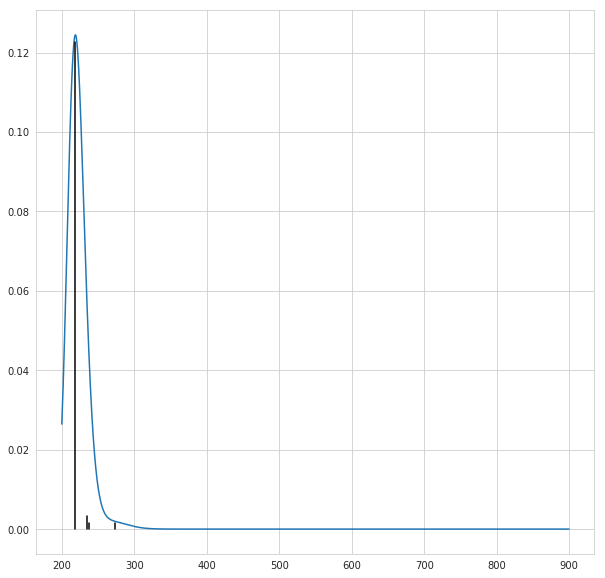

In [3]:
# With a quick custom module (github.com/WillTarran/Comp_Chem_Tools)
from UV_plot import Structure
molecule = Structure('Data/ESoutput.txt')
molecule.read_states()
molecule.gen_spectrum() ; molecule.gen_linespec()
fig, ax, lines = molecule.gen_plot('all')
fig.set_size_inches(10,10)

## Part2. Connecting predictions with progress

### Connecting Models with Materials Design

A (very) quick primer on OLEDS...<img src="Figs/Scheme.png" style="width:30%;">
* Energy and structure of 'Frontier' Molecular Orbitals in Organic Materials is key performance of Organic Light Emitting Diodes
* Charge carriers (both positive and negative) pass though material by molecule to molecule electron transfers
* Tuning of Orbital Energy of structure by molecular design is vital to understand how to improve performance
* Fortunately... Quantum Chemical modelling software can help, but of course, life isn't always simple...

In the first instance, QC model calculations are used to compare modelled vs measured Orbital Energies for available materials.  Initially, Density Functional Theory (DFT) is used to model one isolated molecule.

In [4]:
LUMO = pd.read_csv('Data/HostLUMO_anon.csv', dtype={'StructureID':'Int64'})

from scipy.stats import linregress
old_x = LUMO['SimpleQC'][LUMO['Group'] == 'old']
old_y = LUMO['Measured'][LUMO['Group'] == 'old']
b, a, r, p, se = linregress(old_x, old_y)
def baseplot(axes, x, y, a, b):
    for ax in axes:    
        scale = np.linspace(-3.0, -0.5, 51)
        ax.set_ylim(-3.5, -1.0) ; ax.set_ylabel('Measured Value / eV', fontsize=14)
        ax.set_xlim(-3.0, -0.5) ; ax.set_xlabel('Modelled Value / eV', fontsize=14)
        ax.scatter(x, y, s=100, alpha=0.7)
        ax.plot(scale, a + b * scale, 'k:')
regr = f'Regression: $r^2=${round(r**2,2)}, $p=${round(p,2)}'

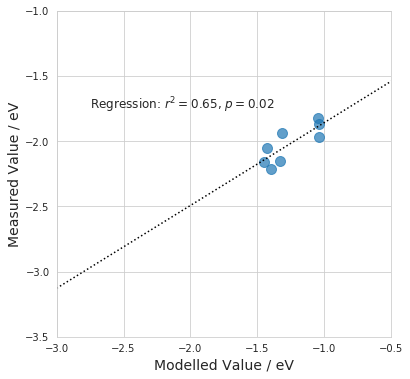

In [5]:
# Starting point for project with a handful of measured materials
fig, ax = plt.subplots(figsize=(6,6))
baseplot([ax], old_x, old_y, a, b)
ax.text(-2.75, -1.75, regr, fontsize=12);

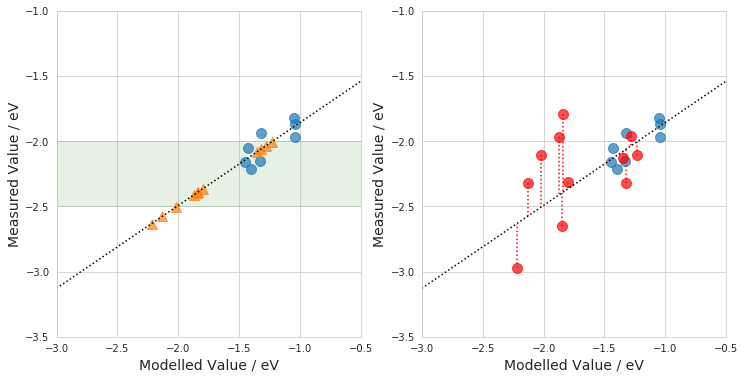

In [6]:
# Round 1 Predicted Values Are Selected for Synthesis
LUMO['Round1'] = a + b * LUMO['SimpleQC'][LUMO['Group']=='mid']
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(12,6))
ax1.fill_between([-3,0],[-2,-2],[-2.5,-2.5], alpha=0.1, color='g')
baseplot([ax1,ax2], old_x, old_y, a, b)
ax1.scatter(LUMO['SimpleQC'], LUMO['Round1'], marker='^', s=100, alpha=0.7)
ax2.scatter(LUMO['SimpleQC'][LUMO['Group']=='mid'],
            LUMO['Measured'][LUMO['Group']=='mid'],
            color='r', s=100, alpha=0.7)
ax2.vlines(LUMO['SimpleQC'][LUMO['Group']=='mid'],
           LUMO['Measured'][LUMO['Group']=='mid'],
           LUMO['Round1'][LUMO['Group']=='mid'], linestyles=':', colors='r');

### What's happened?!
Round 1 Materials are more structurally diverse than initial sample, giving issues with extrapolation in simple model.  *Underlying reason turns out to be related to differing degrees of structural relaxation*

More robust (and expensive!) quantum chemical methodology developed to account for relaxation and molecular environment.

In [7]:
# Reviewed regression with Multistep Model
new_x = LUMO['MultistepQC'][LUMO['Group'] != 'new']
new_y = LUMO['Measured'][LUMO['Group'] != 'new']
b2, a2, r2, p2, se2 = linregress(new_x, new_y)
regr2 = 'Regression: $r^2=${}, $p=${:0.2e}'.format(round(r2**2,2),p2)

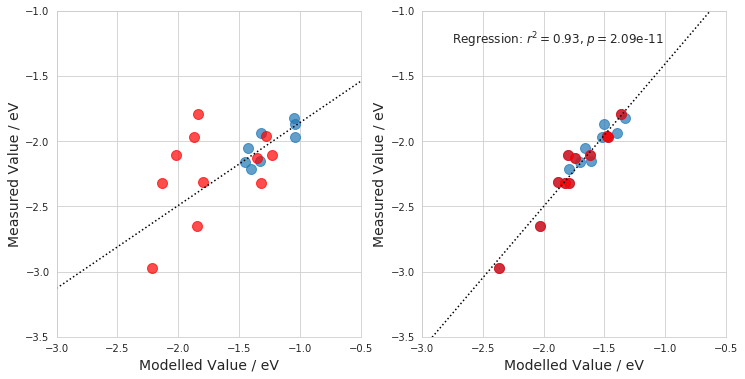

In [8]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(12,6))
baseplot([ax1], old_x, old_y, a, b)
ax1.scatter(LUMO['SimpleQC'][LUMO['Group']=='mid'],
            LUMO['Measured'][LUMO['Group']=='mid'],
            color='r', s=100, alpha=0.7)
baseplot([ax2], new_x, new_y, a2, b2)
ax2.scatter(LUMO['MultistepQC'][LUMO['Group']=='mid'],
            LUMO['Measured'][LUMO['Group']=='mid'],
            color='r', s=100, alpha=0.7)
ax2.text(-2.75, -1.25, regr2, fontsize=12);

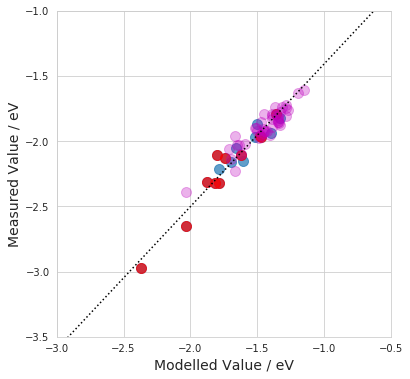

In [9]:
# Finally - further work return to original -1.5 to -2 eV range...
fig, ax = plt.subplots(figsize=(6,6))
baseplot([ax], new_x, new_y, a2, b2)
ax.scatter(LUMO['MultistepQC'][LUMO['Group']=='mid'],
           LUMO['Measured'][LUMO['Group']=='mid'],
           color='r', s=100, alpha=0.7)
ax.scatter(LUMO['MultistepQC'][LUMO['Group']=='new'],
          LUMO['Measured'][LUMO['Group']=='new'],
          color='m', s=100, alpha=0.3);

## Part3. Moving on...

### New projects in diverse areas...

Researchers at LUT, Finland have developed a fantastic integrated weather and industrial process model, giving predictions for costs of synthetic chemicals and fuels using only [renewable resources](https://www.strommarkttreffen.org/2018-06-29_Fasihi_Synthetic_fuels&chemicals_options_and_systemic_impact.pdf)<img src="RET/NorthAfrica.png" alt="LCOE Energy in North Africa" style="width:40%;">

* Best sites are often separated from significant population centres
* Synthesis of a **transportable** fuel could allow Renewable Energy generation in areas with poor access to direct renewable electricity!
* Project Proposal for technical solution that could reduce the production cost of a particular fuel
* Initial estimates of potential costs for synthesis, shipping and transport indicate energy supply at 1.5x to 2x average wholesale price in many areas...
* **Does this rule out the project as viable for creating a new business?!**

## Review of example electricity market data for illustration of credible price distribution

US wholesale contract data is available from [US Energy Information Administration](https://www.eia.gov/electricity/wholesale/).  Analysis here is of 2018 data on wholesale electricity contracts reported by [Intercontinental Exchange](https://www.theice.com/index) for the trading hubs shown:

<img src="RET/hub-map.png" alt="US trading Hubs" style="width:50%;">

In [10]:
data = pd.read_csv('RET/US_2018_wholesale.csv', parse_dates=[1,2,3], thousands=',', usecols=[0,1,2,3,6,7,8])
data.head(3)

,Price hub,Trade date,Delivery start date,Delivery end date,Contract Avg Price $/MWh,Change,Daily volume MWh
0,ERCOT North 345KV Peak,2018-04-01,2018-01-05,2018-01-05,39.0,16.0,1600
1,ERCOT North 345KV Peak,2018-11-01,2018-01-12,2018-01-12,34.0,-5.0,800
2,ERCOT North 345KV Peak,2018-01-15,2018-01-16,2018-01-16,77.5,43.5,1600


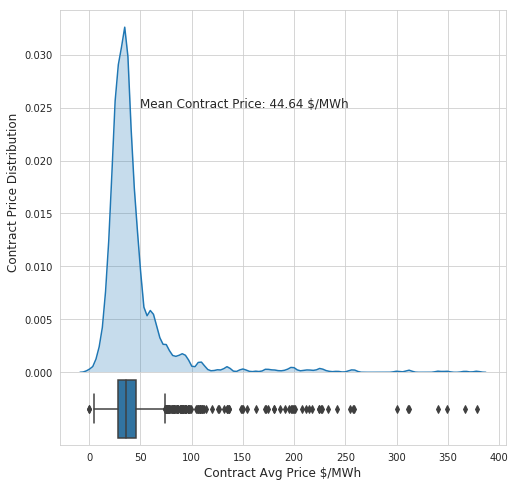

In [11]:
fig, [ax1, ax2] = plt.subplots(2,1, sharex=True,figsize=(8,8), gridspec_kw = {'height_ratios':[5,1]})
ax1.set_ylabel('Contract Price Distribution', fontsize=12)
ax1.text(s=f"Mean Contract Price: {round(data['Contract Avg Price $/MWh'].mean(),2)} $/MWh",
        x=50, y=0.025, fontsize=12)
ax2.xaxis.label.set_fontsize(12)
fig.subplots_adjust(hspace=0)
sns.kdeplot(data['Contract Avg Price $/MWh'], shade=True, ax=ax1, bw='silverman', legend=False) #note, silverman may be over-smoothed
sns.boxplot(data['Contract Avg Price $/MWh'], ax=ax2);

Reported data represents average contract value, independent of delivered volume.  Given that contracts vary in size, it is more useful to consider the quantities of energy supplied and the value of contracts...

In [12]:
data['Contract Days'] = (data['Delivery end date'] - data['Delivery start date']).dt.days + 1
data['Total Delivered'] = data['Daily volume MWh'] * data['Contract Days']
data['Contract Value'] = data['Contract Avg Price $/MWh'] * data['Total Delivered']
print('Power Weighted Mean Contract Price:',
       round((data['Contract Avg Price $/MWh'] * data['Total Delivered']).sum() / data['Total Delivered'].sum(), 2),
     '$/MWh')

Power Weighted Mean Contract Price: 42.86 $/MWh


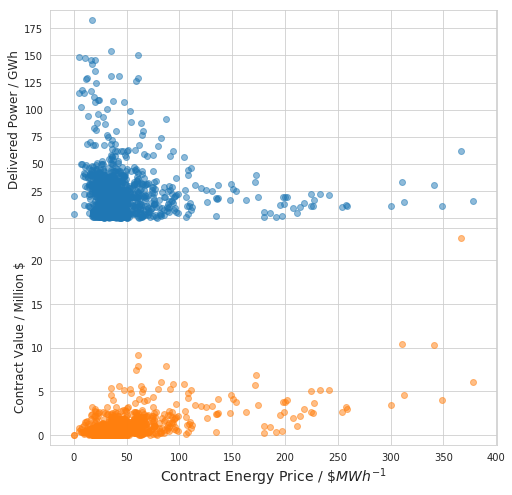

In [13]:
fig, [ax1,ax2] = plt.subplots(2,1,figsize=(8,8), sharex=True)
fig.subplots_adjust(hspace=0)
ax1.set_ylabel('Delivered Power / GWh', fontsize=12)
ax2.set_xlabel(r'Contract Energy Price / $\$MWh^{-1}$', fontsize=14)
ax2.set_ylabel('Contract Value / Million $', fontsize=12)
ax1.scatter(data['Contract Avg Price $/MWh'], data['Total Delivered'] / 1000, color='tab:blue', alpha=0.5)
ax2.scatter(data['Contract Avg Price $/MWh'], data['Contract Value'] / 1000000, color='tab:orange', alpha=0.5);

### Use Weighted kde for assessment of contracts adjusted by delivered power

Matplotlib/Seaborn libraries do not have builtin weighted kde functions (as far as I know?!).  Weighted GaussianKDE is available in Scipy Stats v1.2.0+

In [14]:
from scipy.stats import gaussian_kde
import scipy ; print(scipy.__version__)

1.2.1


In [15]:
weighted_avg = gaussian_kde(data['Contract Avg Price $/MWh'],
                            bw_method=0.08, weights=data['Total Delivered'].astype('float64'))
def plot_weighted(data, weighted_avg):
    x = np.linspace(0,400,4001)
    fig, [ax1, ax2] = plt.subplots(2,1, sharex=True, figsize=(8,8), gridspec_kw = {'height_ratios':[5,1]})
    fig.subplots_adjust(hspace=0)
    ax1.set_ylabel('Relative Distribution', fontsize=14)
    ax2.xaxis.label.set_fontsize(14)
    ax1.plot(x, weighted_avg.pdf(x), 'k', label='Weighted by Delivered Power')
    sns.kdeplot(data['Contract Avg Price $/MWh'], shade=True, ax=ax1, bw='silverman', legend=True)
    sns.boxplot(data['Contract Avg Price $/MWh'], ax=ax2)
    return fig, [ax1, ax2]

In [16]:
mean_contract = data['Contract Avg Price $/MWh'].mean()

# Integrated power weighted KDE for low & hi limits
power_low = round(weighted_avg.integrate_box_1d(1.5 * mean_contract,400), 3)
power_hi  = round(weighted_avg.integrate_box_1d(2 * mean_contract,400), 3)

# segment Contract Values above limits
total_value = data['Contract Value'].sum()
big_tail = data[data['Contract Avg Price $/MWh'] > 1.5 * mean_contract]
small_tail = data[data['Contract Avg Price $/MWh'] > 2 * mean_contract]
value_low = round(big_tail['Contract Value'].sum() / total_value, 3)
value_hi = round(small_tail['Contract Value'].sum() / total_value, 3)
print(power_low, power_hi, value_low, value_hi)

0.106 0.057 0.292 0.215


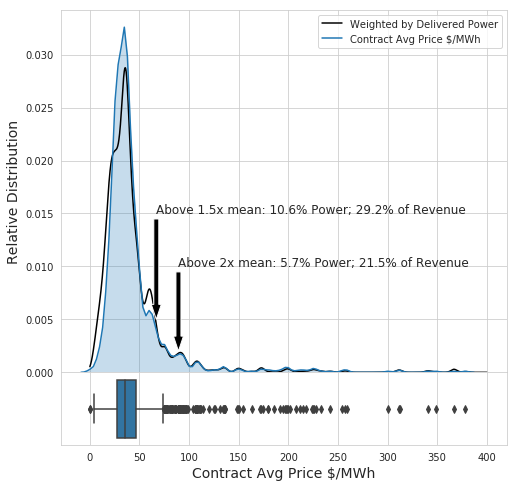

In [17]:
arrow={'facecolor': 'black', 'width': 5, 'headwidth': 10, 'headlength': 15}
fig, [ax1, ax2] = plot_weighted(data, weighted_avg)
ax1.annotate(f'Above 1.5x mean: {100*power_low}% Power; {100*value_low}% of Revenue',
             xy=(1.5*mean_contract,0.005), xytext=(1.5*mean_contract,0.015),
             arrowprops=arrow, fontsize=12)
ax1.annotate(f'Above 2x mean: {100*power_hi}% Power; {100*value_hi}% of Revenue',
            xy=(2*mean_contract,0.002), xytext=(2*mean_contract,0.01),
             arrowprops=arrow, fontsize=12);

## Thanks for listening

Sorry about the messy code blocks - need to work on my html/css!

Some bits of (non-confidential) code on [GitHub/WillTarran](https://github.com/WillTarran)

## APPENDIX
### Estimation of bandwidth for scipy stats matching seaborn 'silverman'

(0, 150)

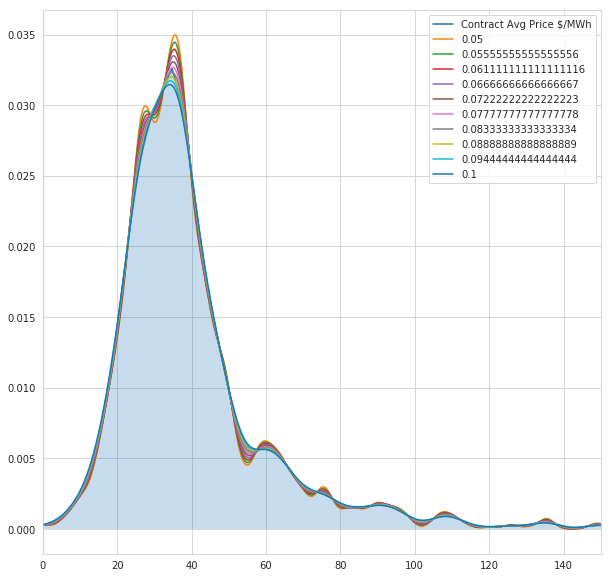

In [18]:
x = np.linspace(0,400,4001)
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(data['Contract Avg Price $/MWh'], shade=True, ax=ax, bw='silverman', legend=True)
for i in np.linspace(0.05, 0.1, 10):
    k = gaussian_kde(data['Contract Avg Price $/MWh'], bw_method=i)
    ax.plot(x, k.pdf(x), label=i)
ax.legend()
ax.set_xlim(0, 150)